In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage import exposure

<ipython-input-2-07129a32546f>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


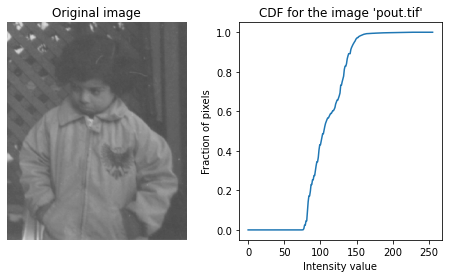

In [2]:
def cumulative_histogram(hist):
  cumsum_hist = np.cumsum(hist)/np.sum(hist)
  return cumsum_hist

def test2_1():
  img = imread('pout.tif')
  hist, bins = np.histogram(img.ravel(),256,[0,256])
  cumsum_hist = cumulative_histogram(hist)
  # print(img.shape)
  fig, axs = plt.subplots(1, 2, figsize=(8, 4))
  axs[0].imshow(img, cmap="gray", vmax=255, vmin=0)
  axs[0].axis('off')
  axs[0].set_title("Original image")
  
  axs[1].plot(cumsum_hist)
  # axs[1].hist(np.array(img).flatten(), bins=bins, density=True)
  axs[1].set_title('CDF for the image \'pout.tif\'')
  axs[1].set_xlabel('Intensity value')
  axs[1].set_ylabel('Fraction of pixels')
  fig.savefig('2.1.png') 
  fig.show()


test2_1()

<ipython-input-3-2cced5d3ff87>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


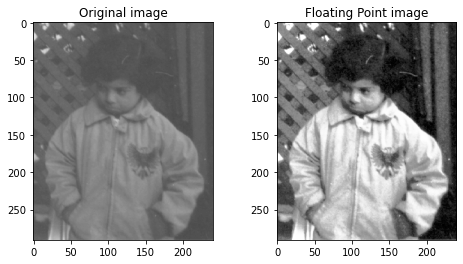

In [3]:
def CDF_map(intensity, CDF):
    return CDF[intensity]

def Image_to_CDFimage(img, CDF):
    CDFimage = CDF_map(img, CDF) 
    return CDFimage

def test2_2():
  img = imread('pout.tif')
  hist, bins = np.histogram(img.ravel(),256,[0,256])
  cumsum_hist = cumulative_histogram(hist)

  newImg = Image_to_CDFimage(img, cumsum_hist)

  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  axs[0].imshow(img, cmap="gray", vmax=255, vmin=0)
  axs[0].set_title("Original image")
  axs[1].imshow(newImg * 255, cmap="gray", vmax=255, vmin=0)
  axs[1].set_title("Floating Point image")  
  
  fig.show()
  fig.savefig('2.2.png')

  # plt.gray()  # show the filtered result in grayscale
  # ax1 = fig.add_subplot(121)  # left side
  # ax2 = fig.add_subplot(122)  # right side
  # ax1.set_title('Original image')
  # ax2.set_title('Floating-point image')
  # ax1.imshow(img)
  # ax2.imshow(newImg)
  # # plt.title('mean filtering of salt & pepper')
  # plt.savefig('2.2.png')
  # plt.show()
  # plt.close()

  

test2_2()


In [4]:
def inverse_cdf(l, cdf):
  subset  = np.take(range(256), np.where(cdf >= l))
  return np.min(subset)

# def inverse_cdf(l, cdf):
#   result  = np.argmin(np.where(cdf >= l, cdf, 1))
#   return result

<ipython-input-9-2509dec24316>:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


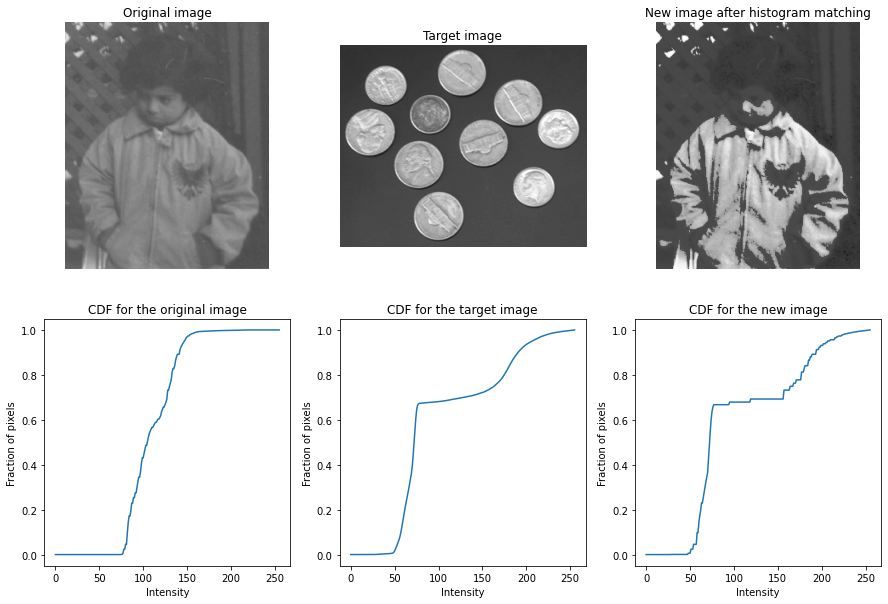

In [9]:
def histogram_matching(original_img, target_img):  
  orignal_hist, _ = np.histogram(original_img.ravel(),256,[0,256])
  target_hist, _ = np.histogram(target_img.ravel(),256,[0,256])

  original_CDF = cumulative_histogram(orignal_hist)
  target_CDF = cumulative_histogram(target_hist)
  original_CDFimg = Image_to_CDFimage(original_img, original_CDF)

  (X,Y) = original_img.shape
  output_img = np.zeros((X,Y))
  for x in range(0,X):
    for y in range(0,Y):
      output_img[x,y] = inverse_cdf(original_CDFimg[x,y], target_CDF)
  return output_img  

def test2_4():
  img1 = imread('pout.tif')
  img2 = imread('coins.png')
  
  img1_hist, _ = np.histogram(img1.ravel(),256,[0,256])
  img2_hist, _ = np.histogram(img2.ravel(),256,[0,256])
  img1_CDF = cumulative_histogram(img1_hist)
  img2_CDF = cumulative_histogram(img2_hist)

  newImg = histogram_matching(img1, img2)
  newImg_hist, _ = np.histogram(newImg.ravel(),256,[0,256])
  newImg_CDF = cumulative_histogram(newImg_hist)

  fig, axs = plt.subplots(2, 3, figsize=(15, 10))

  axs[0, 0].imshow(img1, cmap='gray', vmax=255, vmin=0)
  axs[0, 0].axis('off')
  axs[0, 0].set_title('Original image')
  axs[0, 1].imshow(img2, cmap="gray", vmax=255, vmin=0)
  axs[0, 1].axis('off')
  axs[0, 1].set_title('Target image')
  axs[0, 2].imshow(newImg, cmap='gray', vmax=255, vmin=0)
  axs[0, 2].axis('off')
  axs[0, 2].set_title('New image after histogram matching')

  axs[1, 0].plot(img1_CDF)
  axs[1, 0].set_title('CDF for the original image')
  axs[1, 0].set_xlabel('Intensity')
  axs[1, 0].set_ylabel('Fraction of pixels')

  axs[1, 1].plot(img2_CDF)
  axs[1, 1].set_title('CDF for the target image')
  axs[1, 1].set_xlabel('Intensity')
  axs[1, 1].set_ylabel('Fraction of pixels')

  axs[1, 2].plot(newImg_CDF)
  axs[1, 2].set_title('CDF for the new image')
  axs[1, 2].set_xlabel('Intensity')
  axs[1, 2].set_ylabel('Fraction of pixels')
  fig.savefig('2.4.png') 
  fig.show()

test2_4()

<ipython-input-6-d0bb022e2eee>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


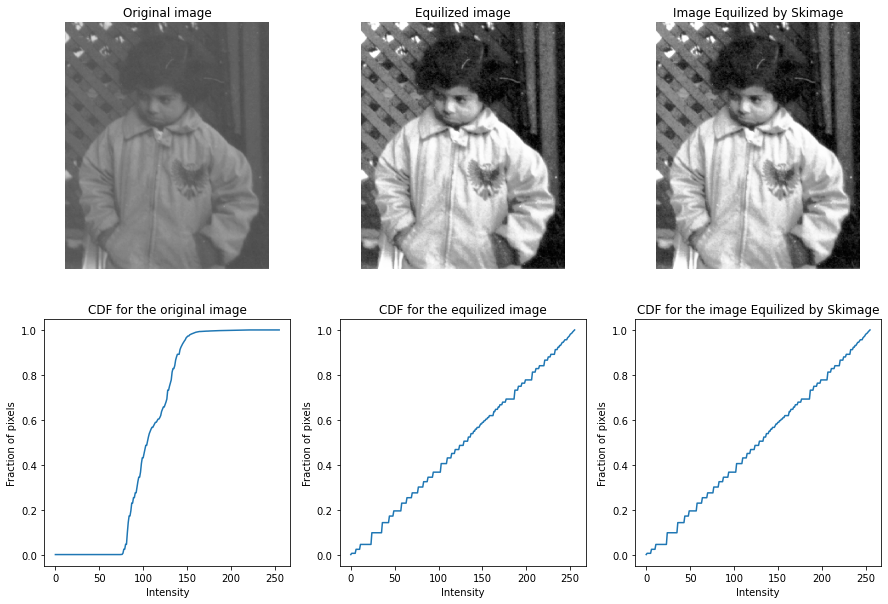

In [6]:
def histogram_equalization(img):
    target_img = np.arange(0, 256)
    new_img = histogram_matching(img, target_img)
    return new_img

def test2_5():
    img = imread('pout.tif')
    equilized_img = histogram_equalization(img)
    equilized_img_by_ski = exposure.equalize_hist(img)

    img_hist, _ = np.histogram(img.ravel(),256,[0,256])
    equilized_img_hist, _ = np.histogram(equilized_img.ravel(),256,[0,256])
    
    img_CDF = cumulative_histogram(img_hist)
    equilized_img_CDF = cumulative_histogram(equilized_img_hist)
    equilized_img_by_ski_CDF, _ = exposure.cumulative_distribution(equilized_img_by_ski)

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    axs[0, 0].imshow(img, cmap='gray', vmax=255, vmin=0)
    axs[0, 0].axis('off')
    axs[0, 0].set_title('Original image')

    axs[0, 1].imshow(equilized_img, cmap="gray", vmax=255, vmin=0)
    axs[0, 1].axis('off')
    axs[0, 1].set_title('Equilized image')

    axs[0, 2].imshow(equilized_img_by_ski*255, cmap='gray', vmax=255, vmin=0)
    axs[0, 2].axis('off')
    axs[0, 2].set_title('Image Equilized by Skimage')

    axs[1, 0].plot(img_CDF)
    axs[1, 0].set_title('CDF for the original image')
    axs[1, 0].set_xlabel('Intensity')
    axs[1, 0].set_ylabel('Fraction of pixels')

    axs[1, 1].plot(equilized_img_CDF)
    axs[1, 1].set_title('CDF for the equilized image')
    axs[1, 1].set_xlabel('Intensity')
    axs[1, 1].set_ylabel('Fraction of pixels')

    axs[1, 2].plot(equilized_img_by_ski_CDF)
    axs[1, 2].set_title('CDF for the image Equilized by Skimage')
    axs[1, 2].set_xlabel('Intensity')
    axs[1, 2].set_ylabel('Fraction of pixels')
    fig.savefig('2.5.png') 
    fig.show()

test2_5()
